## <center>Let's find the Best choice for emigrate using data science!</center>
## <center>Capstone Project - IBM Data Science Professional Certificate</center>

------------


**Welcome to my notebook! 
This is my final proyect for the IBM Data Science Certification.**

------------



**Author : Pablo Gómez**

------------

# **1. Introduction**

### **Objective**

In this project we will focus on using everything we learned to find the best city to emigrate within New Zealand. Taking into account some parameters such as the number of schools, shopping centers,medical centers, restaurants, etc. 

### **Target Audiance**

* Families, young professionals looking for a change in their lives, who consider New Zealand a good option to settle. People who are finding out the best option based on their tastes and preferences and looking for a summary with quantitative fundamentals. 


### **Data Description**
For this project we'll use the following data:


1. ***New Zealand Schools DATA SET***
* **Data Source:** https://catalogue.data.govt.nz/dataset/directory-of-educational-institutions
* **Description:** A list of New Zealand schools, including their contact details and institutional information. This includes state and private schools. You can also build your own tailor-made list of schools.

2. ***New Zealand List of Hospitals***
* **Data Source:** https://www.health.govt.nz/your-health/certified-providers/public-hospital
* **Description:**  Full list of certified providers in New Zealand.


3. ***Venue Data using Foursquare API***
* **Data Source:** https://foursquare.com/developers/apps
* **Description:** From Foursquare API we can get the name,category,latitude,longitude for each venue.

### **Tech Stack Used**
Pivot Tables, Web Scraping, Foursquare API, Geocoder, Beautiful Soup, Folium, Pandas, Numpy

### **Table of Content**
1. Introduction
1. Import Libraries
1. Analysing Schools Data
1. Folium Maps of the top 5 citys Schools
1. Analysing Hospitals Data
1. Foursquare API for finding the top venues for each of the TOP 5 Cities selected
1. Visualization
1. Conclusion
1. Future Work


# **2. Import Libraries**

In [3]:
# install geopy to access geocoder package
!pip install geopy
# install beautifulsoup4 for web scraping
!pip install beautifulsoup4
# install requests to gain access to an URL
!pip install requests
# install kmeans for clustering
!pip install kmeans
# install folium for visualization
!pip install folium
# install sklearn
!pip install -U scikit-learn

     |████████████████████████████████| 115 kB 4.4 MB/s eta 0:00:01
  Created wheel for kmeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=12004 sha256=162be1ede87aa15efe160e7c4bd7b4716671373acb6cdf089ea02cd04d8eae57
  Stored in directory: /root/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built kmeans
     |████████████████████████████████| 22.3 MB 4.3 MB/s eta 0:00:01     |███████████████████████▉        | 16.6 MB 4.3 MB/s eta 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matpl

In [4]:
# import all necessary libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from bs4 import BeautifulSoup
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Mainly because I believe that education for my children is the most important thing that I should look for when emigrating, we will start working with a data set of schools in New Zealand and we will look for the cities with the most educational options. 

# **3. Analysing Schools Data**

In [5]:
import pandas as pd
# making dataframe 
dfschool = pd.read_csv("../input/school-directory-new-zealand/schooldirectory-07-08-2021-083020.csv") 
dfschool=dfschool.dropna()
# output the dataframe
dfschool.head(10)

,School_Id,Org_Name,Telephone,Fax,Email,Contact1_Name,URL,Add1_Line1,Add1_Suburb,Add1_City,Add2_Line1,Add2_Suburb,Add2_City,Add2_Postal_Code,Urban_Area,Org_Type,Definition,Authority,School_Donations,CoEd_Status,Territorial_Authority,Regional_Council,Local_Office_Name,Education_Region,General_Electorate,Māori_Electorate,Area_Unit,Ward,Col_Id,Col_Name,Latitude,Longitude,Isolation_Index,Decile,Roll_Date,Total,European,Māori,Pacific,Asian,MELAA,Other,International
2,6783,Remarkables Primary School,03 441 4044,03 442 2052,office@remarkables.school.nz,Helen Reed (Acting),http://www.remarkablesprimary.school.nz,49 Lake Avenue,Frankton,Queenstown,P O Box 2564,Wakatipu,Queenstown,9349.0,Secondary Urban Area,Full Primary,Not Applicable,State,Donations may be requested,Co-Educational,Queenstown-Lakes District,Otago Region,Dunedin,Otago/Southland,Southland,Te Tai Tonga,Frankton,Queenstown-Wakatipu Ward,99093.0,Kāhui Ako o Wakatipu,-45.022927,168.731799,2.94,10.0,2021-07-01 00:00:00.0000000,606,473,33,20,61,19,0,0
4,4160,TKKM o Te Atihaunui-A-Paparangi,06 347 1653,06 347 1843,office@teatihau.school.nz,Betty-Joe Wiari,http://www.teatihau.school.nz,25 Anaua Street,Putiki,Whanganui,25 Anaua Street,Putiki,Whanganui,4500.0,Main Urban Area,Full Primary,Kura Kaupapa Maori,State,"Donations should not be requested, unless for ...",Co-Educational,Whanganui District,Manawatu-Wanganui Region,Whanganui,Taranaki/Whanganui/Manawatu,Whanganui,Te Tai Hauauru,Putiki,Area Outside Ward,99170.0,Te Hononga Kāhui Kura - Kāhui Ako,-39.946844,175.049331,0.87,2.0,2021-07-01 00:00:00.0000000,100,0,100,0,0,0,0,0
6,4209,TKKM o Manawatu,06 354 2900,06 353 0723,admin@tkkmom.ac.nz,Roberta Kaiwai-Paterangi,http://www.tkkmom.ac.nz,88 Rhodes Drive,Kelvin Grove,Palmerston North,88 Rhodes Drive,Kelvin Grove,Palmerston North,4414.0,Main Urban Area,Full Primary,Kura Kaupapa Maori,State,"Donations should not be requested, unless for ...",Co-Educational,Palmerston North City,Manawatu-Wanganui Region,Whanganui,Taranaki/Whanganui/Manawatu,Palmerston North,Te Tai Hauauru,Kelvin Grove,Area Outside Ward,99170.0,Te Hononga Kāhui Kura - Kāhui Ako,-40.328271,175.645745,0.63,5.0,2021-07-01 00:00:00.0000000,98,2,95,1,0,0,0,0
12,3024,St Teresa's School (Karori),04 939 1725,04 939 1724,office@stteresas.ac.nz,Mary-Angela Tombs,http://www.stteresas.ac.nz,299 Karori Road,Karori,Wellington,299 Karori Road,Karori,Wellington,6012.0,Main Urban Area,Full Primary,Not Applicable,State : Integrated,Donations may be requested,Co-Educational,Wellington City,Wellington Region,Wellington,Wellington,Wellington Central,Te Tai Tonga,Karori South,Onslow-Western Ward,99172.0,Wellington Catholic Community of Learning,-41.285880,174.734099,0.12,10.0,2021-07-01 00:00:00.0000000,119,61,11,19,22,6,0,0
19,4143,Tamariki School,03 384 9014,03 384 9029,admin@tamariki.school.nz,Samuel Smith,http://www.tamariki.school.nz/,86 St John's Street,Woolston,Christchurch,P O Box 19506,Woolston,Christchurch,8241.0,Main Urban Area,Full Primary,Not Applicable,State : Integrated,"Donations should not be requested, unless for ...",Co-Educational,Christchurch City,Canterbury Region,Christchurch,Canterbury/Chatham Islands,Banks Peninsula,Te Tai Tonga,Ferrymead,Linwood Ward,99063.0,Tamai Community of Learning,-43.546479,172.689238,0.12,4.0,2021-07-01 00:00:00.0000000,55,42,7,1,5,0,0,0
20,4144,Tauranga Adventist School,07 579 2505,07 579 2522,office@taurangasda.school.nz,Jo Seluone,http://www.taurangasda.school.nz,19 Moffat Road,Bethlehem,Tauranga,P O Box 16052,Bethlehem,Tauranga,3147.0,Main Urban Area,Full Primary,Not Applicable,State : Integrated,Donations may be requested,Co-Educational,Tauranga City,Bay of Plenty Region,Rotorua,Bay of Plenty/Waiariki,Tauranga,Waiariki,Bethlehem,Otumoetai-Pyes Pa Ward,99157.0,Ngā Whānau O Karaiti Kāhui Ako,-37.712633,176.113183,0.52,6.0,2021-07-01 00:00:00.0000000,116,78,10,6,7,14,1,0
26,6760,Somerville Intermediate School,09 535 1070,09 535 1071,office@somint.school.nz,Yolande Franke,http://www.somerv

In [6]:
#Let's find the TOP 5 cities with the higher options for educartion. 
SC=dfschool.groupby(['Add1_City'])['School_Id'].count()
SC=SC.sort_values(ascending=False)
SC=SC.head(5)
top5cities=SC.index.tolist()

In [7]:
top5cities

['Auckland', 'Christchurch', 'Wellington', 'Hamilton', 'Napier']

In [8]:
NZ_city = dfschool['Add1_City'].unique().tolist()
print(NZ_city)

['Queenstown', 'Whanganui', 'Palmerston North', 'Wellington', 'Christchurch', 'Tauranga', 'Auckland', 'Porirua', 'Rotorua', 'Dunedin', 'Invercargill', 'Ashburton', 'Port Chalmers', 'Tapanui', 'Greymouth', 'Oamaru', 'Timaru', 'Hokitika', 'Lower Hutt', 'Nelson', 'Blenheim', 'Levin', 'Napier', 'Hastings', 'Gisborne', 'Wairoa', 'Masterton', 'Hamilton', 'Taupo', 'North Shore', 'Cambridge', 'Whangaparaoa', 'Waitakere', 'Waiheke Island', 'Whangarei', 'Manukau', 'Balclutha']


# **4. Folium Maps of the top 5 cities Schools**

In [9]:
from folium.plugins import MarkerCluster

In [10]:
lat_NZ = dfschool['Latitude'].mean()
lon_NZ = dfschool['Longitude'].mean()

city_color = {}
for city in NZ_city:
    city_color[city]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

# create map
map_nz = folium.Map(location=[lat_NZ, lon_NZ], zoom_start=6)
    
marker_cluster = MarkerCluster().add_to(map_nz)
    
    
# add markers to map
for lat, lng, Org_Name, Add1_City in zip(dfschool['Latitude'], 
                                         dfschool['Longitude'], 
                                         dfschool['Org_Name'], 
                                         dfschool['Add1_City']):
    label_text = Org_Name + ' - ' + Add1_City
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=city_color[Add1_City],
        fill_color=city_color[Add1_City],
        fill_opacity=0.8).add_to(marker_cluster)      

map_nz

So Auckland,Christchurch, Wellington, Hamilton, Napier we'll be the choosen cities, so we can move with the analysis. 

# **5. Analysing Hospitals Dataset**

**Let's proceed with the hospital's dataset!**

In [26]:
# making dataframe 
dfhosp = pd.read_csv("../input/new-zealand-public-hospitals/LegalEntitySummaryPublicHospital.csv") 
# output the dataframe
dfhosp.head(5)

,Premises Name,Certification Service Type,Service Types,Total Beds,Premises Website,Premises Address Other,Premises Address,Premises Address Suburb/Road,Premises Address Town/City,Premises Address Post Code,DHB Name,Certificate Name,Certification Period (Months),Certificate/License End Date,Current Auditor,Legal Name,Legal Entity Address Other,Legal Entity Address,Legal Entity Address Suburb/Road,Legal Entity Address Town/City,Legal Entity Address Post Code,Legal Entity Postal Address,Legal Entity Postal Address Suburb/Road,Legal Entity Postal Address Town/City,Legal Entity Postal Address Post Code,Legal Entity Website,Unnamed: 26
0,Auckland City Hospital,Public Hospital,"Childrens health, Maternity, Surgical, Medical",1165,NaN,NaN,2 Park Road,Grafton,Auckland,1023,Auckland District Health Board,Auckland District Health Board,No change,1-5-2023,The DAA Group Limited,Auckland District Health Board,"Level 51, Building 10, Greenlane Clinical Centre",214 Green Lane West,NaN,Auckland,1051,Private Bag 92024,NaN,Auckland,1142,http://www.adhb.govt.nz/,NaN
1,Auckland DHB X 3 Units - Mental Health,Public Hospital,Mental health,96,NaN,NaN,2 Park Road,Grafton,Auckland,1023,Auckland District Health Board,Auckland District Health Board,No change,1-5-2023,The DAA Group Limited,Auckland District Health Board,"Level 51, Building 10, Greenlane Clinical Centre",214 Green Lane West,NaN,Auckland,1051,Private Bag 92024,NaN,Auckland,1142,http://www.adhb.govt.nz/,NaN
2,Buchanan Rehabilitation Centre,Public Hospital,Mental health,40,NaN,NaN,27 Sutherland Road,Point Chevalier,Auckland,1025,Auckland District Health Board,Auckland District Health Board,No change,1-5-2023,The DAA Group Limited,Auckland District Health Board,"Level 51, Building 10, Greenlane Clinical Centre",214 Green Lane West,NaN,Auckland,1051,Private Bag 92024,NaN,Auckland,1142,http://www.adhb.govt.nz/,NaN
3,Greenlane Clinical Centre,Public Hospital,"Surgical, Medical",31,NaN,NaN,214 Green Lane West,Epsom,Auckland,1051,Auckland District Health Board,Auckland District Health Board,No change,1-5-2023,The DAA Group Limited,Auckland District Health Board,"Level 51, Building 10, Greenlane Clinical Centre",214 Green Lane West,NaN,Auckland,1051,Private Bag 92024,NaN,Auckland,1142,http://www.adhb.govt.nz/,NaN
4,Tauranga Hospital,Public Hospital,"Psychogeriatric, Geriatric, Mental health, Chi...",360,NaN,NaN,829 Cameron Road,Tauranga South,Tauranga,3112,Bay of Plenty District Health Board,Bay of Plenty District Health Board,36,3-10-2023,The DAA Group Limited,Bay of Plenty District Health Board,NaN,829 Cameron Road,NaN,Tauranga,3112,Private Bag 12024,NaN,Tauranga,3143,NaN,NaN


In [14]:
dfhosp.columns

Index(['Premises Name', 'Certification Service Type', 'Service Types',
       'Total Beds', 'Premises Website', 'Premises Address Other',
       ' Premises Address', ' Premises Address Suburb/Road',
       ' Premises Address Town/City', ' Premises Address Post Code',
       ' DHB Name', 'Certificate Name', 'Certification Period (Months)',
       'Certificate/License End Date', 'Current Auditor', 'Legal Name',
       'Legal Entity Address Other', ' Legal Entity Address',
       ' Legal Entity Address Suburb/Road', ' Legal Entity Address Town/City',
       ' Legal Entity Address Post Code', ' Legal Entity Postal Address',
       ' Legal Entity Postal Address Suburb/Road',
       ' Legal Entity Postal Address Town/City',
       ' Legal Entity Postal Address Post Code', ' Legal Entity Website',
       'Unnamed: 26'],
      dtype='object')

In [23]:
# Passing Type and then Last Name as indices
dfhosp5=dfhosp.loc[dfhosp[' Premises Address Town/City'].isin(top5cities)]

HospitalPivot = pd.pivot_table(data=dfhosp5, index=[' Premises Address Town/City'],
                        columns=['Certification Service Type',"Service Types" ],
                        values='Premises Name',
                        aggfunc=['count']
                        )
HospitalPivot

count  \
Certification Service Type                                 Public Hospital   
Service Types               Childrens health, Maternity, Surgical, Medical   
 Premises Address Town/City                                                  
Auckland                                                               1.0   
Christchurch                                                           NaN   
Hamilton                                                               NaN   
Wellington                                                             NaN   

                                                                            \
Certification Service Type                                                   
Service Types               Childrens health, Surgical, Maternity, Medical   
 Premises Address Town/City                                                  
Auckland                                                               NaN   
Christchurch                                                           1.0   
Hamilton                                                               NaN   
Wellington                                                             NaN   

                                                                                       \
Certification Service Type                                                              
Service Types               Geriatric, Childrens health, Maternity, Surgical, Medical   
 Premises Address Town/City                                                             
Auckland                                                                   NaN          
Christchurch                                                               NaN          
Hamilton                                                                   1.0          
Wellington                                                                 NaN          

                                                                                                      \
Certification Service Type                                                                             
Service Types               Geriatric, Childrens health, Surgical, Mental health, Maternity, Medical   
 Premises Address Town/City                                                                            
Auckland                                                                   1.0                         
Christchurch                                                               NaN                         
Hamilton                                                                   NaN                         
Wellington                                                                 NaN                         

                                                                         \
Certification Service Type                                                
Service Types               Geriatric, Surgical, Mental health, Medical   
 Premises Address Town/City                                               
Auckland                                                            NaN   
Christchurch                                                        1.0   
Hamilton                                                            NaN   
Wellington                                                          NaN   

                                       \
Certification Service Type              
Service Types               Maternity   
 Premises Address Town/City             
Auckland                          1.0   
Christchurch                      NaN   
Hamilton                          NaN   
Wellington                        NaN   

                                                                                                                       \
Certification Service Type                                                                                              
Service Types               Maternity, Medical, Geriatric, Childrens health, Surgical, Psychogeriatri

According to this, it seems that 4 of the top 5 cities we selected from the Schools data sets have complete health services. 
Auckland with the most concentration of them, but Hamilton and Christchurch seem to be a good option too. 

# **6. Foursquare API for finding the top venues for each of the TOP 5 Cities selected**

For the final stage, we'll use FOURSQUARE API, and explore each of the TOP5 selected cities, and see what we find!!

In [28]:
#We'll define Foursquare Credentials

CLIENT_ID = 'IMNENY40EWHMBDLJVP4BW2J4XZDB3F5MXNW2N5AXIHESE5EA' # your Foursquare ID
CLIENT_SECRET = 'NSUWVHGYITKVOQ5AQITRKKSECPGECVO50VMLTNG3BIEXBNP4' # your Foursquare Secret
ACCESS_TOKEN = 'UFM2R1HOPYK0EXGA504XVNGSTFMWSRP0BJCHCKHP0NC45VR2' # your FourSquare Access Token
VERSION = '20180604'# Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

print('Credentials Stored')

Your credentails:
CLIENT_ID: IMNENY40EWHMBDLJVP4BW2J4XZDB3F5MXNW2N5AXIHESE5EA
CLIENT_SECRET:NSUWVHGYITKVOQ5AQITRKKSECPGECVO50VMLTNG3BIEXBNP4
Credentials Stored


In [29]:
top5cities

['Auckland', 'Christchurch', 'Wellington', 'Hamilton', 'Napier']

In [30]:
rows = []
for city in top5cities:
    dfilat="df"+ str(city)+"_lat"
    dfilon="df"+ str(city)+"_lon"
    dfilat=dfschool[(dfschool.Add1_City == city)]['Latitude'].mean()
    dfilon=dfschool[(dfschool.Add1_City == city)]['Longitude'].mean()
    rows.append([city, dfilat, dfilon])

dftop5 = pd.DataFrame(rows, columns=["City", "Lat_mean", "Lon_mean"])
dftop5

,City,Lat_mean,Lon_mean
0,Auckland,-36.884743,174.769950
1,Christchurch,-43.526834,172.618759
2,Wellington,-41.270070,174.796882
3,Hamilton,-37.784125,175.278034
4,Napier,-39.515815,176.876159


In [31]:
for Lat_mean, Lon_mean, City in zip(dftop5['Lat_mean'], dftop5['Lon_mean'], dftop5['City']):
    CityName=City
    print(CityName)

Auckland
Christchurch
Wellington
Hamilton
Napier


In [37]:
df_venues=pd.DataFrame()
for Lat_mean, Lon_mean, City in zip(dftop5['Lat_mean'], dftop5['Lon_mean'], dftop5['City']):
    CityName=City
    radius = 50000 # define radius
    LIMIT=200
    urltest = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            Lat_mean, 
            Lon_mean, 
            radius, 
            LIMIT)
    
    venues_list=[]

    # make the GET request
    results = requests.get(urltest).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    venues_list.append([(
            CityName, 
            Lat_mean, 
            Lon_mean, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    df_venues = df_venues.append(nearby_venues)
    
df_venues=df_venues.reset_index(drop=True)
df_venues.head(5)

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Auckland,-36.884743,174.76995,Mount Eden - Maungawhau,-36.877509,174.764392,Mountain
1,Auckland,-36.884743,174.76995,Rad Coffee Co.,-36.880867,174.761860,Café
2,Auckland,-36.884743,174.76995,Cornwall Park,-36.896585,174.787073,Park
3,Auckland,-36.884743,174.76995,Auckland Domain,-36.861112,174.775033,Park
4,Auckland,-36.884743,174.76995,One Tree Grill,-36.899874,174.772949,Steakhouse


In [38]:
df_venues.tail(5)

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
483,Napier,-39.515815,176.876159,Bollywood,-39.642054,176.843507,Indian Restaurant
484,Napier,-39.515815,176.876159,The Wholefood Kitchen,-39.489357,176.918038,Vegetarian / Vegan Restaurant
485,Napier,-39.515815,176.876159,Heaven's Bakery & Cafe,-39.490615,176.916525,Café
486,Napier,-39.515815,176.876159,Soundshell,-39.490074,176.919547,Performing Arts Venue
487,Napier,-39.515815,176.876159,Paper Mulberry Cafe,-39.827984,176.638658,Café


In [40]:
df_venues.shape

(488, 7)

In [47]:
# Passing Type and then Last Name as indices
output = pd.pivot_table(data=df_venues, index=['Venue Category'],
                        columns=['City'],
                        values='Venue',
                        aggfunc=['count']
                        )
output

count                               \
City                            Auckland Christchurch Hamilton Napier   
Venue Category                                                          
Airport Lounge                       NaN          1.0      NaN    NaN   
Aquarium                             NaN          NaN      NaN    1.0   
Argentinian Restaurant               1.0          NaN      NaN    NaN   
Art Gallery                          1.0          1.0      NaN    NaN   
Arts & Crafts Store                  NaN          1.0      NaN    NaN   
Asian Restaurant                     1.0          3.0      NaN    NaN   
Athletics & Sports                   NaN          NaN      1.0    NaN   
Australian Restaurant                1.0          NaN      NaN    NaN   
BBQ Joint                            NaN          NaN      NaN    1.0   
Bagel Shop                           1.0          NaN      NaN    NaN   
Bakery                               2.0          4.0      3.0    NaN   
Bar                                  4.0          3.0      5.0    1.0   
Bay                                  NaN          1.0      NaN    NaN   
Beach                                4.0          2.0      1.0    4.0   
Beer Bar                             NaN          NaN      NaN    NaN   
Beer Garden                          NaN          NaN      NaN    1.0   
Bistro                               2.0          NaN      NaN    1.0   
Board Shop                           NaN          NaN      1.0    NaN   
Bookstore                            NaN          NaN      1.0    NaN   
Botanical Garden                     1.0          1.0      NaN    NaN   
Boutique                             NaN          1.0      NaN    NaN   
Breakfast Spot                       NaN          1.0      1.0    NaN   
Brewery                              2.0          NaN      1.0    1.0   
Bridge                               NaN          NaN      NaN    NaN   
Burger Joint                         1.0          3.0      4.0    2.0   
Café                                14.0         17.0     26.0   17.0   
Campground                           NaN          NaN      1.0    NaN   
Cheese Shop                          NaN          1.0      NaN    NaN   
Chinese Restaurant                   1.0          NaN      NaN    NaN   
Climbing Gym                         1.0          NaN      NaN    NaN   
Clothing Store                       1.0          NaN      NaN    NaN   
Cocktail Bar                         NaN          NaN      1.0    NaN   
Coffee Shop                          NaN          7.0      2.0    NaN   
Cricket Ground                       NaN          NaN      1.0    NaN   
Dam                                  NaN          NaN      1.0    NaN   
Dance Studio                         1.0          NaN      NaN    NaN   
Deli / Bodega                        1.0          NaN      NaN    NaN   
Department Store                     NaN          1.0      2.0    NaN   
Dessert Shop                         1.0          1.0      NaN    1.0   
Diner                                NaN          1.0      NaN    NaN   
Dive Bar                             NaN          NaN      NaN    NaN   
Dog Run                              1.0          NaN      NaN    NaN   
Electronics Store                    NaN          1.0      NaN    1.0   
Exhibit                              NaN          NaN      NaN    NaN   
Farm                                 1.0          NaN      1.0    1.0   
Farmers Market                       1.0          2.0      1.0    1.0   
Fast Food Restaurant                 NaN          NaN      3.0    NaN   
Fish & Chips Shop                    NaN          NaN      1.0    NaN   
Fish Market                          NaN          NaN      NaN    NaN   
Flea Market                          NaN          1.0      NaN    NaN   
Food & Drink Shop                    NaN          NaN      1.0    1.0   
Food Court                           1.0          1.0      NaN    NaN   
Food Truck          

In [61]:
dfgroupcity = df_venues.groupby(['City', 'Venue Category'])['Venue'].count()

dfgroupcity=pd.DataFrame(dfgroupcity)
dfgroupcity=dfgroupcity.sort_values(by='Venue', ascending=False)
dfgroupcity=dfgroupcity.reset_index()
dfgroupcity.head(10)



,City,Venue Category,Venue
0,Hamilton,Café,26
1,Christchurch,Café,17
2,Napier,Café,17
3,Wellington,Café,16
4,Auckland,Café,14
5,Napier,Restaurant,7
6,Christchurch,Coffee Shop,7
7,Wellington,Coffee Shop,6
8,Auckland,Park,6
9,Wellington,Restaurant,6


# **7. Visualization**

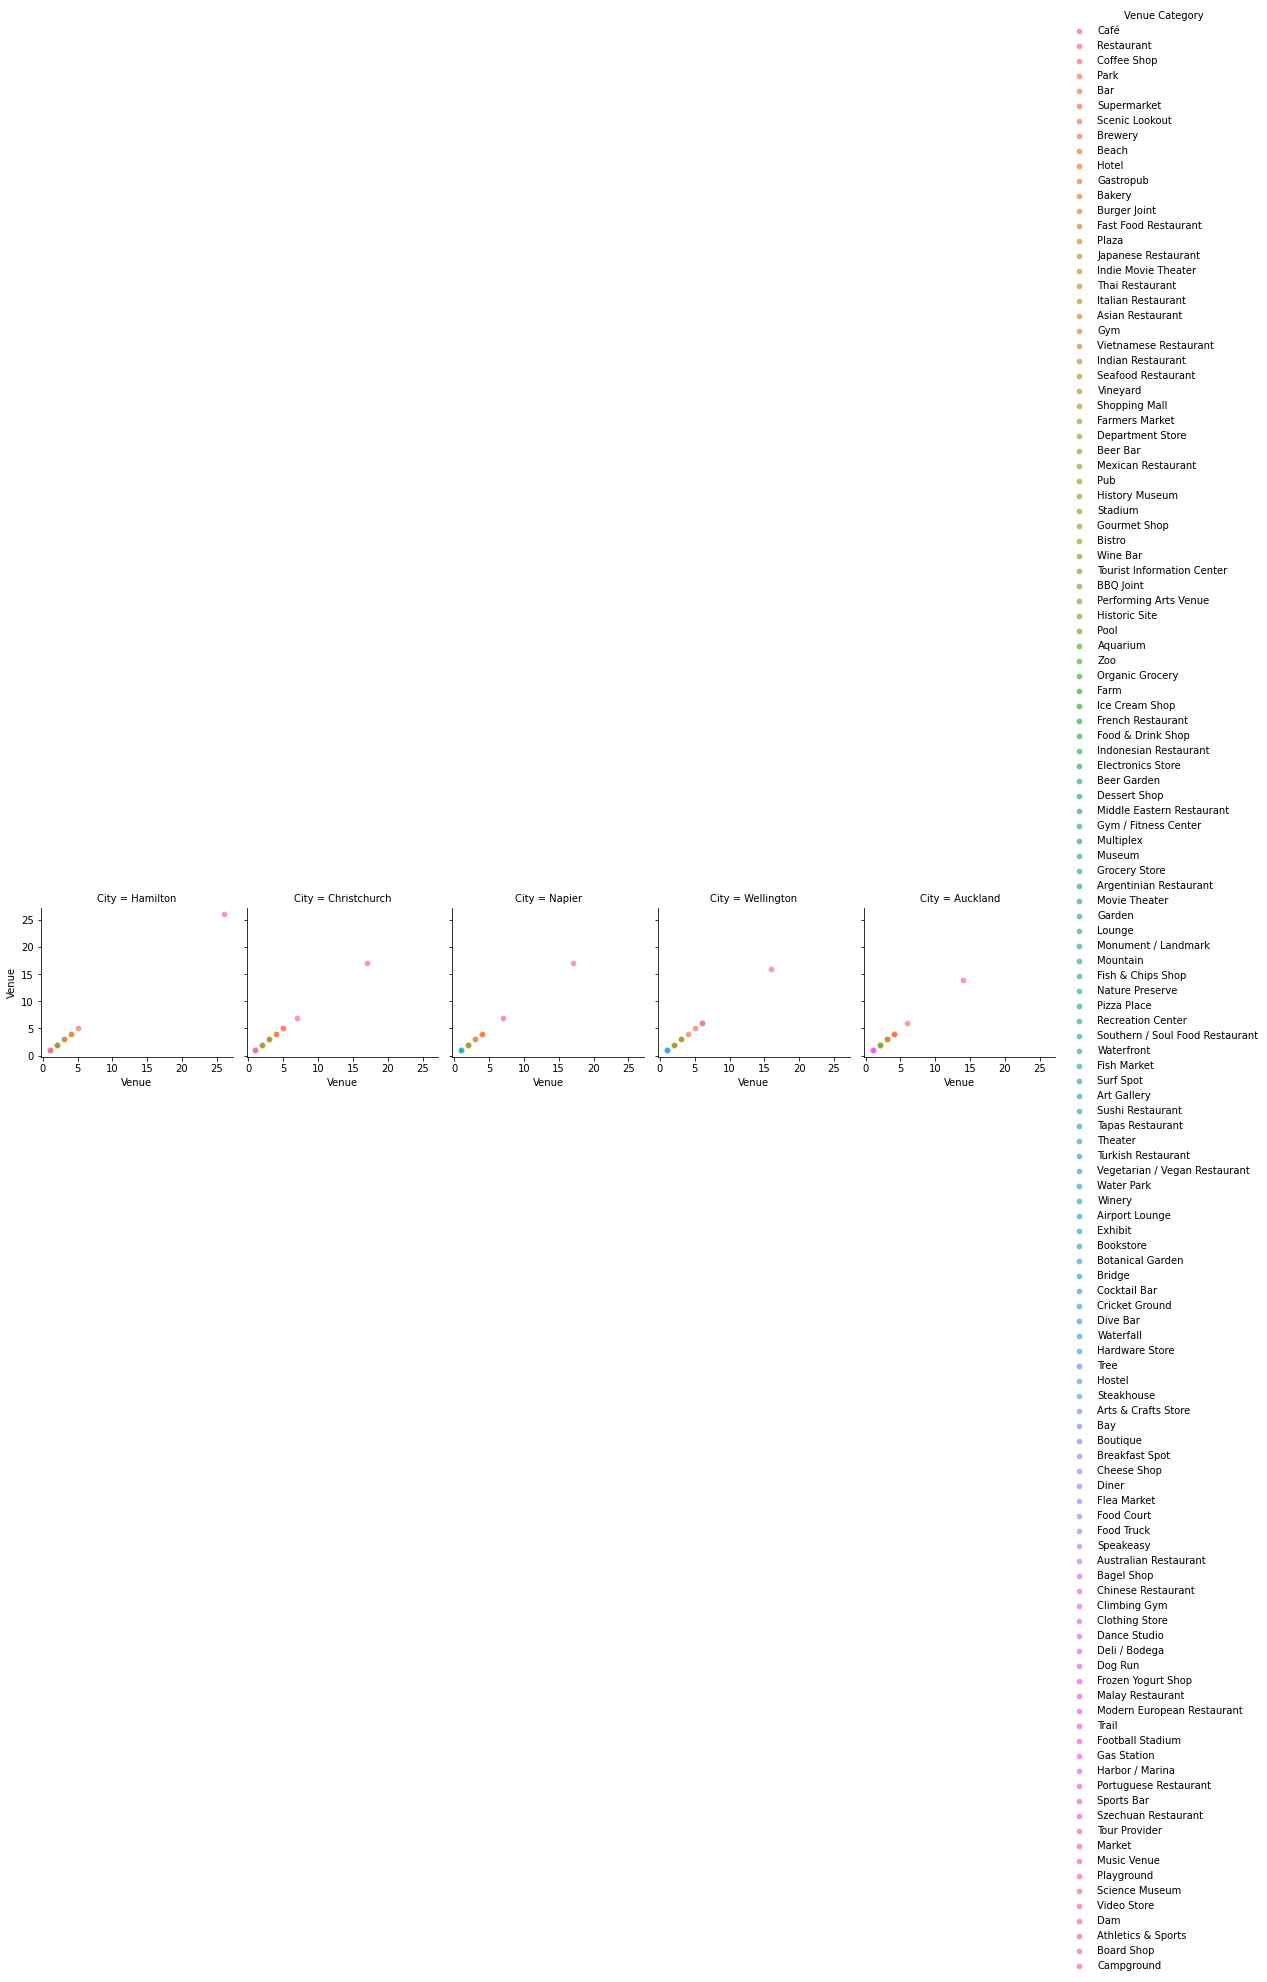

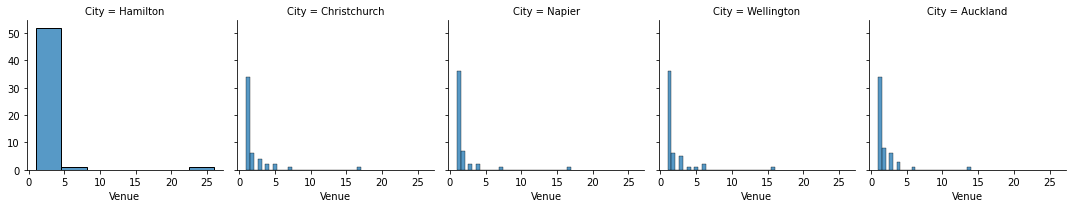

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


#City	Venue Category	Venue

#for vc in dfgroupcity['Venue Category']:
   # sns.countplot(x ='City', data = dfgroupcity)
    #print(vc)
    
g1 = sns.FacetGrid(dfgroupcity, col="City", hue="Venue Category")
g1.map(sns.scatterplot, "Venue", "Venue", alpha=.7)
g1.add_legend()

g2 = sns.FacetGrid(dfgroupcity, col="City")
g2.map(sns.histplot, "Venue")

Lets check how many venues are there per neighborhood

# **8. Conclusion**

In my case, due to the interests that I have with my family, my choice is for Hamilton as the winning city. It has a balance between tranquility (It is not a city as big as Auckland) and has all the essential services, mainly education and good hospitals.
It has a good number of burger joints, a bookstore, bars, a beach, a football stadium, etc.

This conclusion can change quickly based on your interests. The tables and graphs above allow quick visualization to aid in your decision.
  

# **8. Future Work**

* It's possible to graph custom markers with folium for each venue category. 
* Build a reccomender system for the city according to values of interest. 
* Consider more then 100 venues in a city for analysis using Foursquare api.


### **Thank you!**

